In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sns
import numpy as np

In [6]:
df_ml = pd.read_csv('../artifacts/results_ml_models.csv')
df_cnn = pd.read_csv('../artifacts/results_cnn_models.csv')
df_trans = pd.read_csv('../artifacts/results_Transformer_models.csv')

# CNN Models

In [7]:
df_cnn["label"] = df_cnn.model  + "| subjc: " + df_cnn.subject.astype(str)  
df_cnn.groupby(['model','subject']).mean()


,,acc_test,Precision,Recall,F1_score,auc,kappa,mathew_coef,acc_train,acc_val
model,subject,,,,,,,,,
DeepConvNet,All,0.319654,0.446292,0.319654,0.331879,0.498822,0.146655,0.159204,0.447843,0.333874
EEGNet,All,0.405508,0.457938,0.405508,0.421589,0.502927,0.197551,0.201404,0.427400,0.411669
HopefullNet,All,0.453024,0.388896,0.453024,0.410216,0.550319,0.120843,0.125863,0.933900,0.470556
ShallowConvNet,All,0.388769,0.454096,0.388769,0.405063,0.531227,0.181916,0.187937,0.428776,0.387898


In [9]:
df_cnn.head()

,acc_test,Precision,Recall,F1_score,auc,kappa,mathew_coef,model_name,model,dataset,subject,acc_train,acc_val,label
0,0.453024,0.388896,0.453024,0.410216,0.550319,0.120843,0.125863,HopefullNet,HopefullNet,Motor Imaginary,All,0.933900,0.470556,HopefullNet| subjc: All
1,0.405508,0.457938,0.405508,0.421589,0.502927,0.197551,0.201404,EEGNet,EEGNet,Motor Imaginary,All,0.427400,0.411669,EEGNet| subjc: All
2,0.388769,0.454096,0.388769,0.405063,0.531227,0.181916,0.187937,ShallowConvNet,ShallowConvNet,Motor Imaginary,All,0.428776,0.387898,ShallowConvNet| subjc: All
3,0.319654,0.446292,0.319654,0.331879,0.498822,0.146655,0.159204,DeepConvNet,DeepConvNet,Motor Imaginary,All,0.447843,0.333874,DeepConvNet| subjc: All


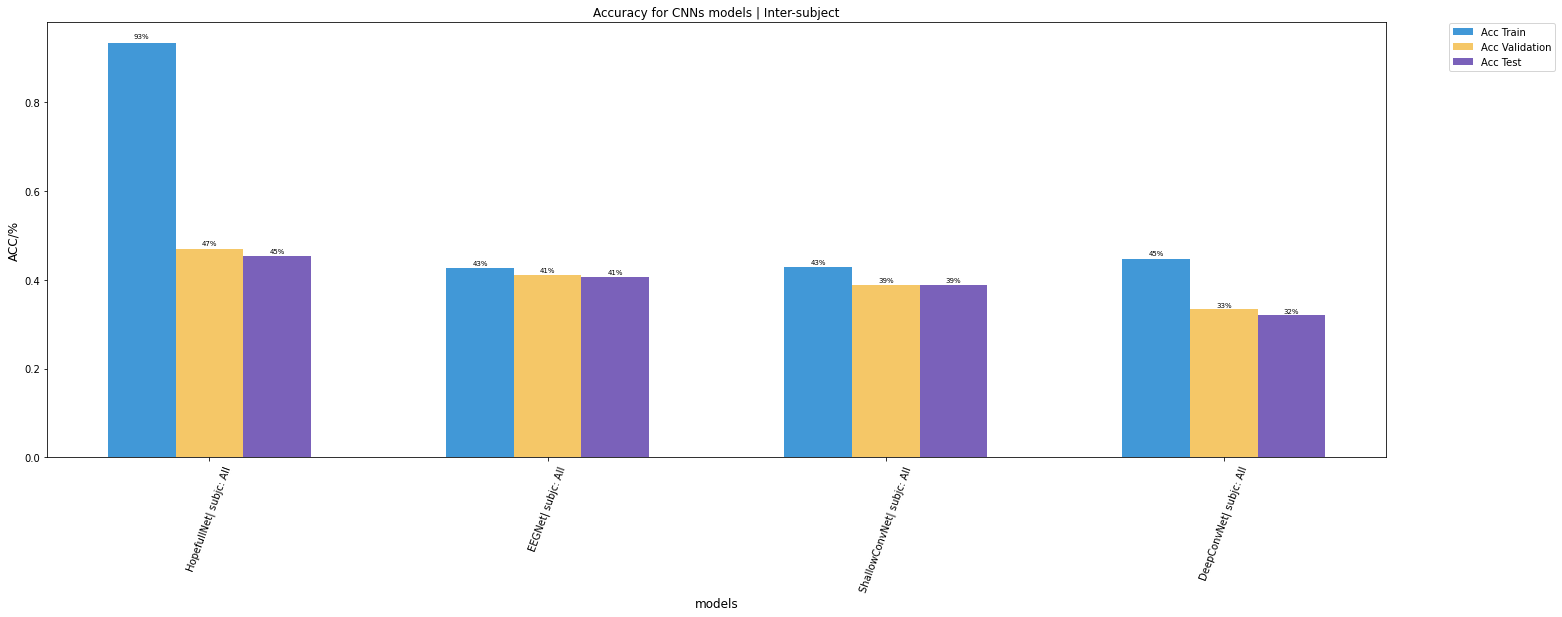

In [11]:
top_1 = df_cnn.iloc[:,-3]
top_3 = df_cnn.iloc[:,-2]
top_5 = df_cnn.iloc[:,0]
xlabels = df_cnn.iloc[:,-1]
N = len(df_cnn.iloc[:,0])
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars
fig, ax = plt.subplots(figsize=(24,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7')
rects2 = ax.bar(ind + width, top_3, width, color='#f5c767')
rects3 = ax.bar(ind + 2*width, top_5, width, color='#7a61ba')
ax.set_xticks(ind + width)
ax.set_xticklabels(xlabels,fontsize=10, rotation=70)
ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("ACC/%", fontsize=12)
ax.set_title('Accuracy for CNNs models | Inter-subject')
ax.legend((rects1[0], rects2[0],rects3[0]),('Acc Train', 'Acc Validation','Acc Test'),bbox_to_anchor=(1.13, 1.01))
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100))+'%' ,ha='center', va='bottom',fontsize=7)

labelvalue(rects1)
labelvalue(rects2)
labelvalue(rects3)
plt.savefig('../artifacts/barplot_cnn.png',dpi=200, format='png', bbox_inches='tight')
plt.show()

# Machine Learning Models

In [12]:

df_ml['label'] = df_ml.pipeline.replace("time domain features -> wavelet", "TmFq + Wvl") +' + '+ df_ml.model_name
df_ml["label"] = df_ml.label  + "| subjc: " + df_ml.subject.astype(str)  
df_ml.groupby(['label','subject']).mean()


,,cross_val_score,Accuracy,Precision,Recall,F1_score,auc,kappa,mathew_coef
label,subject,,,,,,,,
PCA + KNN| subjc: All,All,0.708,0.204159,0.403338,0.204159,0.211837,0.501508,0.046655,0.052980
PCA + SVM| subjc: All,All,0.391,0.362949,0.447759,0.362949,0.386297,0.550013,0.159545,0.164963
PCA + XGB| subjc: All,All,0.677,0.404807,0.410420,0.404807,0.407342,0.570758,0.141850,0.141932
TmFq + Wvl + KNN| subjc: All,All,0.303,0.314070,0.322836,0.314070,0.317927,0.514899,0.012734,0.012754
TmFq + Wvl + SVM| subjc: All,All,0.314,0.354847,0.326619,0.354847,0.337681,0.512882,0.020962,0.021155
TmFq + Wvl + XGB| subjc: All,All,0.384,0.394005,0.333697,0.394005,0.355764,0.520943,0.032727,0.033866


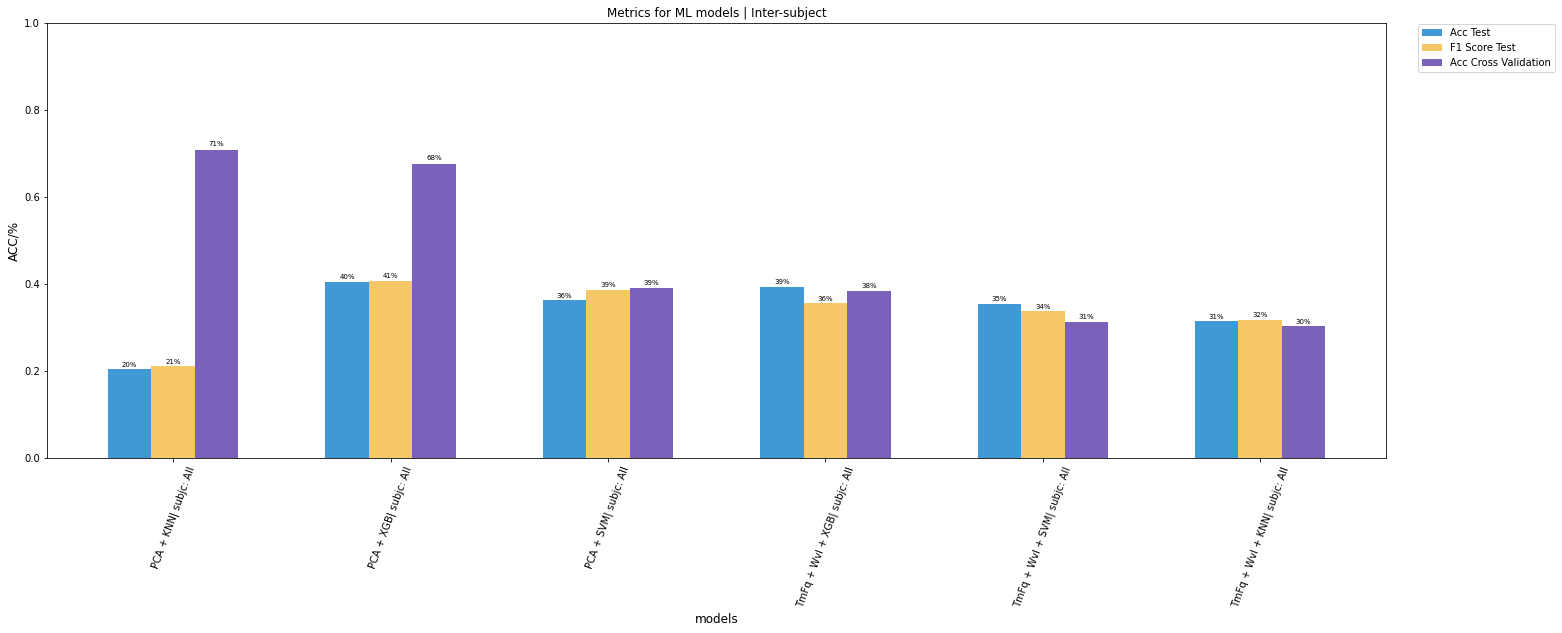

In [18]:
top_1 = df_ml.iloc[:,1]
top_3 = df_ml.iloc[:,4]
top_5 = df_ml.iloc[:,0]
xlabels = df_ml.iloc[:,-1]
N = len(df_ml.iloc[:,0])
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars
fig, ax = plt.subplots(figsize=(24,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7')
rects2 = ax.bar(ind + width, top_3, width, color='#f5c767')
rects3 = ax.bar(ind + 2*width, top_5, width, color='#7a61ba')
ax.set_xticks(ind + width)
ax.set_xticklabels(xlabels,fontsize=10, rotation=70)
ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("ACC/%", fontsize=12)
ax.set_title('Metrics for ML models | Inter-subject')
ax.legend((rects1[0], rects2[0],rects3[0]),('Acc Test', 'F1 Score Test','Acc Cross Validation'),bbox_to_anchor=(1.13, 1.01))
ax.set_ylim([0, 1])
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100))+'%' ,ha='center', va='bottom',fontsize=7)

labelvalue(rects1)
labelvalue(rects2)
labelvalue(rects3)
plt.savefig('../artifacts/barplot_ml.png',dpi=200, format='png', bbox_inches='tight')
plt.show()

# Transformers Models

In [15]:

df_trans["label"] = df_trans.model  + "| subjc: " + df_trans.subject.astype(str)  
trans_gb = df_trans.groupby(['model','subject']).mean()

In [16]:
df_trans.head()

,acc_test,Precision,Recall,F1_score,auc,kappa,mathew_coef,model_name,model,dataset,subject,acc_train,acc_val,label
0,0.471922,0.368527,0.471922,0.377883,0.623385,0.110195,0.126256,Transformer,Transformer,Motor Imaginary,All,0.256257,0.388979,Transformer| subjc: All
1,0.428186,0.457705,0.428186,0.438851,0.539668,0.203728,0.205316,Transformer Pos Enc,Transformer Pos Enc,Motor Imaginary,All,0.535248,0.415991,Transformer Pos Enc| subjc: All


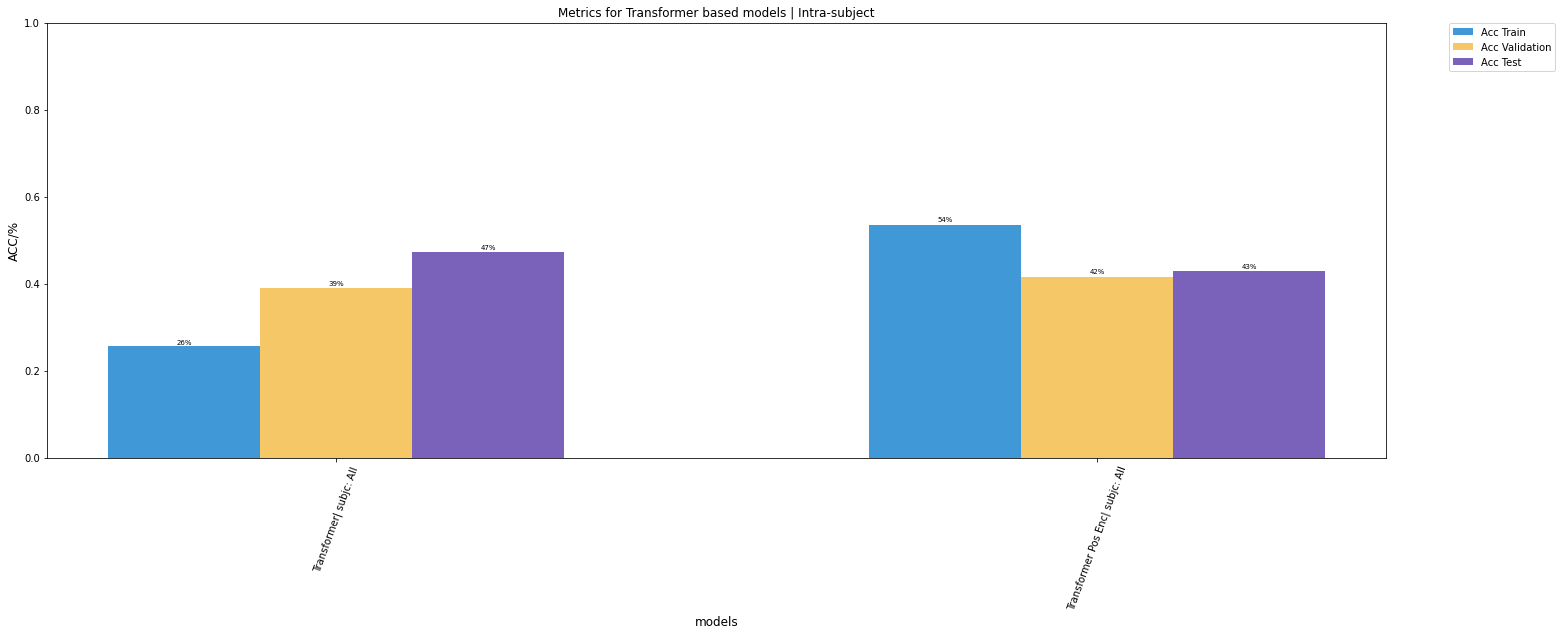

In [19]:
top_1 = df_trans.iloc[:,-3]
top_3 = df_trans.iloc[:,-2]
top_5 = df_trans.iloc[:,0]
xlabels = df_trans.iloc[:,-1]
N = len(df_trans.iloc[:,0])
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars
fig, ax = plt.subplots(figsize=(24,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7')
rects2 = ax.bar(ind + width, top_3, width, color='#f5c767')
rects3 = ax.bar(ind + 2*width, top_5, width, color='#7a61ba')
ax.set_xticks(ind + width)
ax.set_xticklabels(xlabels,fontsize=10, rotation=70)
ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("ACC/%", fontsize=12)

ax.set_title('Metrics for Transformer based models | Intra-subject')
ax.legend((rects1[0], rects2[0],rects3[0]),('Acc Train', 'Acc Validation','Acc Test'),bbox_to_anchor=(1.13, 1.01))
ax.set_ylim([0, 1])
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100))+'%' ,ha='center', va='bottom',fontsize=7)

labelvalue(rects1)
labelvalue(rects2)
labelvalue(rects3)
plt.savefig('../artifacts/barplot_trans.png',dpi=200, format='png', bbox_inches='tight')
plt.show()

# Comparing Models

In [22]:
all_models = pd.concat([
                    df_trans[['model','acc_test']].rename(columns = {'model':'Model', 'acc_test':'Accuracy'}), 
                    df_cnn[['model','acc_test']].rename(columns = {'model':'Model', 'acc_test':'Accuracy'}), 
                    df_ml[['label','Accuracy']].rename(columns = {'label':'Model'})], axis=0, ignore_index=True)
all_models = all_models.sort_values(['Accuracy'], ascending=False)
all_models.to_csv('../artifacts/results_all_models.csv', index=False, header=True)                    
all_models                    

,Model,Accuracy
0,Transformer,0.471922
2,HopefullNet,0.453024
1,Transformer Pos Enc,0.428186
3,EEGNet,0.405508
7,PCA + XGB| subjc: All,0.404807
9,TmFq + Wvl + XGB| subjc: All,0.394005
4,ShallowConvNet,0.388769
8,PCA + SVM| subjc: All,0.362949
10,TmFq + Wvl + SVM| subjc: All,0.354847
5,DeepConvNet,0.319654


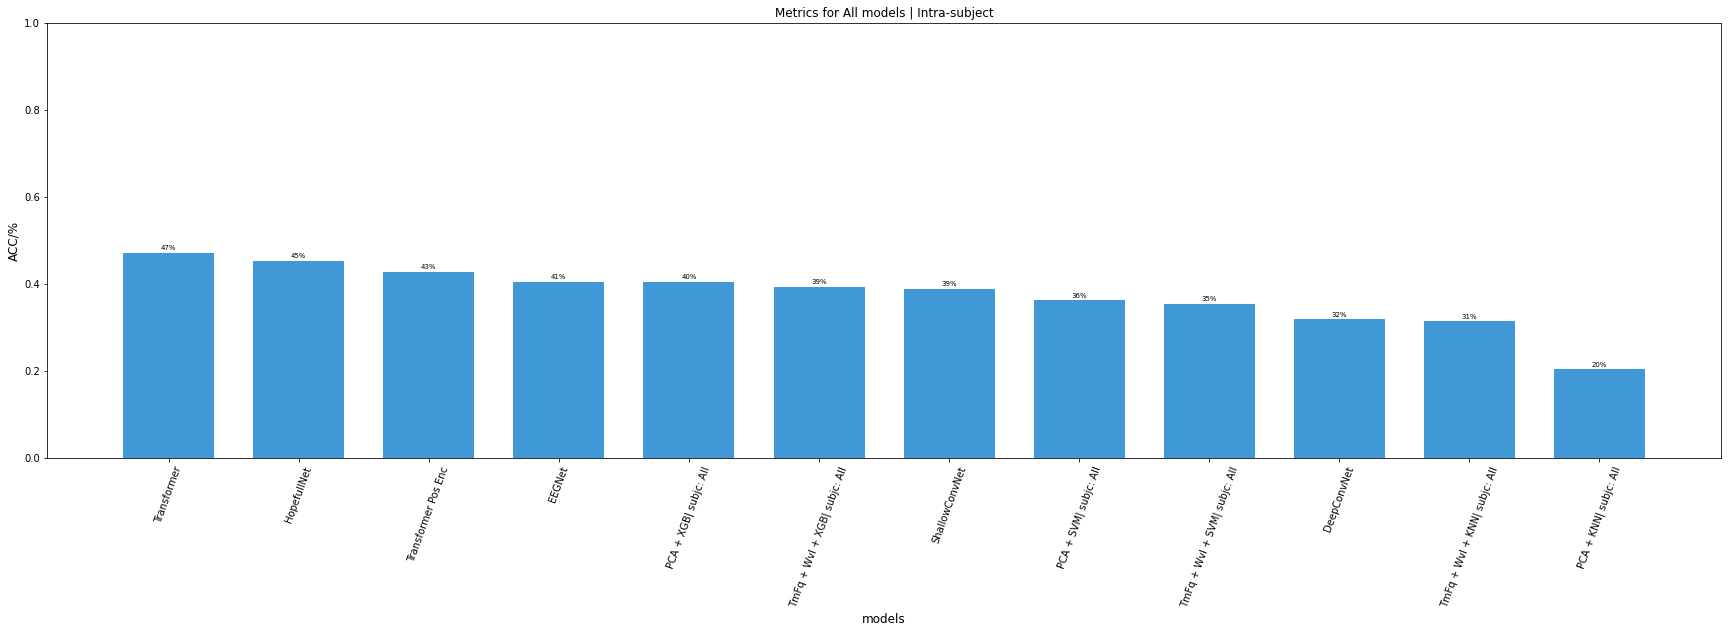

In [24]:
top_1 = all_models.iloc[:,1]
xlabels = all_models.iloc[:,0]
N = len(all_models.iloc[:,0])
ind = np.arange(N)  # the x locations for the groups
width = 0.7      # the width of the bars
fig, ax = plt.subplots(figsize=(30,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7')
ax.set_xticks(ind )
ax.set_xticklabels(xlabels,fontsize=10, rotation=70)
ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("ACC/%", fontsize=12)
ax.set_title('Metrics for All models | Intra-subject')
# ax.legend(rects1[0],'Accuracy Test')
ax.set_ylim([0, 1])

def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100))+'%' ,ha='center', va='bottom',fontsize=7)

labelvalue(rects1)

plt.savefig('../artifacts/barplot_all.png',dpi=200, format='png', bbox_inches='tight')
plt.show()